In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
admission = pd.read_csv('Admission_Predict_Ver1.1.csv')
admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


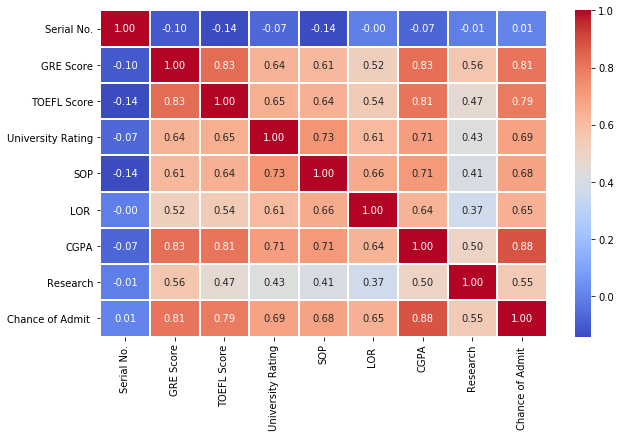

In [4]:
fig,ax = plt.subplots(figsize=(10, 6))
sns.heatmap(admission.corr(), ax=ax, annot=True, linewidths=1, fmt= '.2f',cmap="coolwarm")
plt.show()

In [5]:
admission.drop(['Serial No.'],axis=1, inplace=True)

In [7]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
y = admission["Chance of Admit "].values
x = admission.drop(["Chance of Admit "],axis=1)

# separating train (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 101)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

c:\users\m&d\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
c:\users\m&d\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\m&d\appdata\local\programs\python\python36\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.o

In [11]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

real value of y_test[1]: 0.93 -> the predict: [0.91093352]
real value of y_test[2]: 0.74 -> the predict: [0.81010688]
r_square score:  0.7767101021347024
r_square score (train dataset):  0.830315287407692


In [25]:
from sklearn import neighbors
r_2 = []
for i in range(1,20):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_head_knn = knn.predict(x_test)
    r_2.append(r2_score(y_test,y_head_knn))


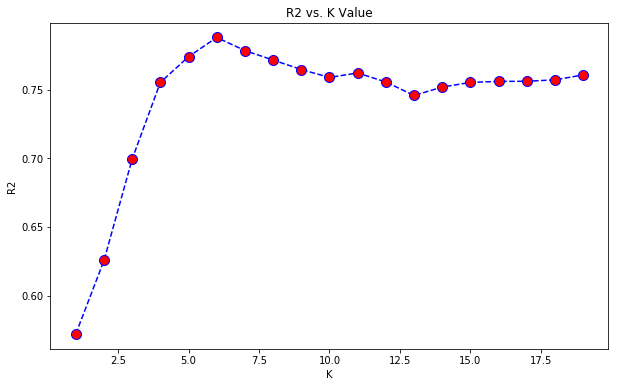

In [26]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),r_2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.show()

In [27]:
knn = neighbors.KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train,y_train)
y_head_knn = knn.predict(x_test)
print(r2_score(y_test,y_head_knn))

0.778344759941517


## 1. I have scaled the features so they are all in (0-1) scale.
## 2. The two methods yield similar R2 scores for the test set (~0.78)
## 3. For KNN regression I had to do one more step to optimize K value
## 4. For this dataset, overall I prefer LR model.
## 5. From the correlation heatmap, GRE, CGPA and TOEFL scores are the three most important features. SOP, LOR and research are the three least important features, by decreasing dimensions and only use the more important features might decrease chance of overfitting and get better results.